# Geological Logging Dataset
Commonly used in petrophysics and geology, particularly in the context of well

### Description of Key Variables in the Dataset

- **RHOB (Bulk Density):** The density of the rock, including pore spaces. Helps estimate the volume of hydrocarbons in the reservoir.  
- **GR (Gamma Ray):** Measures the natural radioactivity of rocks. Used to distinguish between shales and non-shales (e.g., sandstone and limestone).  
- **DEPTH_MD (Measured Depth):** The depth of the well measured along the wellbore, from the surface to the point of interest.  
- **NPHI (Neutron Porosity):** Assesses rock porosity based on the response of hydrogen atoms to neutron radiation. Useful for identifying the amount of water and hydrocarbons in the pores.  
- **PEF (Photoelectric Factor):** Helps differentiate mineral types in the rock. Indicates the rock’s response to gamma radiation and assists in lithology and fluid type estimation.  
- **DTC (Compressional Wave Velocity):** Measures the velocity of compressional waves traveling through the rock. Important for evaluating rock properties and identifying hydrocarbons.  


In [30]:
# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# Import essential libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'force2020_data_unsupervised_learning.csv'
df = pd.read_csv(file_path)

# Remove missing values and update the dataframe
df = df.dropna().reset_index(drop=True)

# Display the first few rows to inspect the dataset
df.head()


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
1,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
2,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
3,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085


In [31]:
# Compute and display the correlation matrix for numerical features
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
RHOB,1.000000,-0.140226,0.804204,-0.871491,0.206762,-0.890753
GR,-0.140226,1.000000,-0.082701,0.364806,-0.189419,0.334506
DEPTH_MD,0.804204,-0.082701,1.000000,-0.682375,0.445507,-0.811666
NPHI,-0.871491,0.364806,-0.682375,1.000000,-0.259631,0.907930
PEF,0.206762,-0.189419,0.445507,-0.259631,1.000000,-0.384708
DTC,-0.890753,0.334506,-0.811666,0.907930,-0.384708,1.000000


---
 Observations:
- There is a strong correlation between **RHOB** and **DTC**.  
- **DEPTH_MD** could be discarded as it is highly correlated with **RHOB** and **DTC**.  
- **NPHI** also has a strong correlation with **RHOB** and **DTC**.  
- **PEF** and **GR** do not show any evident correlation.  
---


In [32]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
import numpy as np

# Create a list of columns to plot, excluding 'DEPTH_MD'
columns_to_plot = [col for col in df.columns if col != 'DEPTH_MD']

# Calculate the number of subplots required (square grid layout)
num_subplots = len(columns_to_plot)
rows = int(np.ceil(np.sqrt(num_subplots)))
cols = int(np.ceil(num_subplots / rows))

# Create subplot grid
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=columns_to_plot)

# Add boxplots for each column
for i, column in enumerate(columns_to_plot):
    row = i // cols + 1  # Calculate row position
    col = i % cols + 1  # Calculate column position
    fig.add_trace(
        go.Box(y=df[column], name=column),  # Create boxplot for the column
        row=row, col=col  # Place boxplot in the subplot grid
    )

# Configure layout for the plot
fig.update_layout(
    height=800,
    width=800,
    title_text="Boxplots of Variables",
    showlegend=False
)

# Display the plot
fig.show()

In [33]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()
print("NaN values per column:")
print(nan_counts)

# Drop rows with NaN values and update the dataframe
df_cleaned = df.dropna()
df = df_cleaned

# Extract the 'DEPTH_MD' column (this might be used for further analysis)
depth_column = df['DEPTH_MD']

# Display the cleaned dataframe
df

NaN values per column:
RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
1,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
2,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
3,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
12197,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
12198,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
12199,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
12200,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


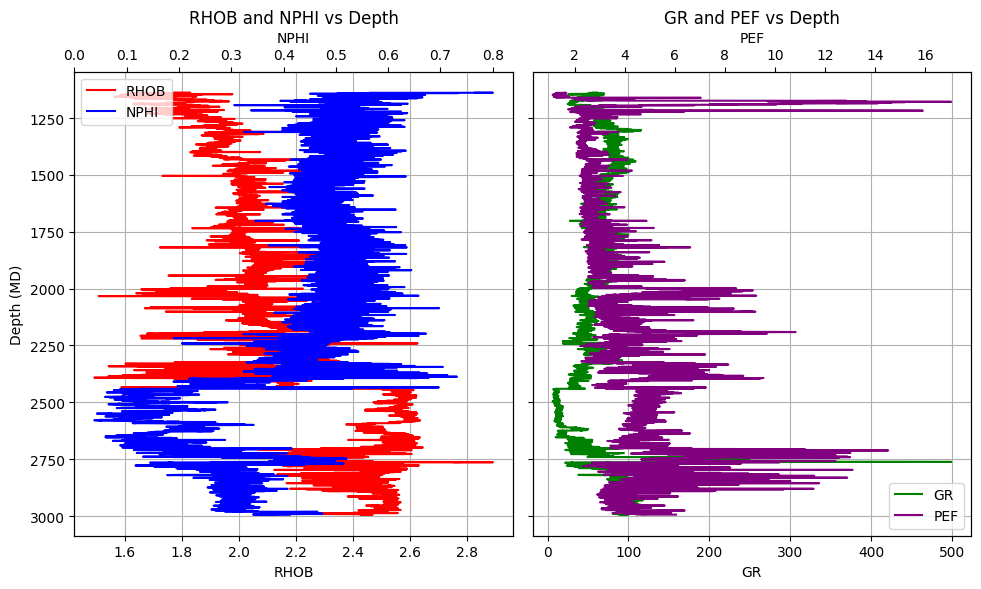

In [34]:
import matplotlib.pyplot as plt

# Create a figure with two vertical subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)  # Share depth axis

# Invert the y-axis so depth increases downward
ax1.invert_yaxis()

# --- First subplot: RHOB and NPHI vs Depth ---
ax1.plot(df['RHOB'], df['DEPTH_MD'], color='red', label='RHOB')
ax1.set_xlabel('RHOB')
ax1.set_ylabel('Depth (MD)')
ax1.set_title('RHOB and NPHI vs Depth')
ax1.grid(True)

# Create a secondary x-axis for NPHI
ax2 = ax1.twiny()
ax2.plot(df['NPHI'], df['DEPTH_MD'], color='blue', label='NPHI')
ax2.set_xlabel('NPHI')

# Combine legends for both axes
ax1_lines, ax1_labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
ax2.legend(ax1_lines + ax2_lines, ax1_labels + ax2_labels, loc='best')

# --- Second subplot: GR and PEF vs Depth ---
ax3.plot(df['GR'], df['DEPTH_MD'], color='green', label='GR')
ax3.set_xlabel('GR')
ax3.set_title('GR and PEF vs Depth')
ax3.grid(True)

# Create a secondary x-axis for PEF
ax4 = ax3.twiny()
ax4.plot(df['PEF'], df['DEPTH_MD'], color='purple', label='PEF')
ax4.set_xlabel('PEF')

# Combine legends for both axes
ax3_lines, ax3_labels = ax3.get_legend_handles_labels()
ax4_lines, ax4_labels = ax4.get_legend_handles_labels()
ax4.legend(ax3_lines + ax4_lines, ax3_labels + ax4_labels, loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [35]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    """Removes outliers from a given column using the IQR method."""
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold

    # Filter out values outside the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for selected columns
columns_to_clean = ['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']
for column in columns_to_clean:
    df = remove_outliers_iqr(df, column)

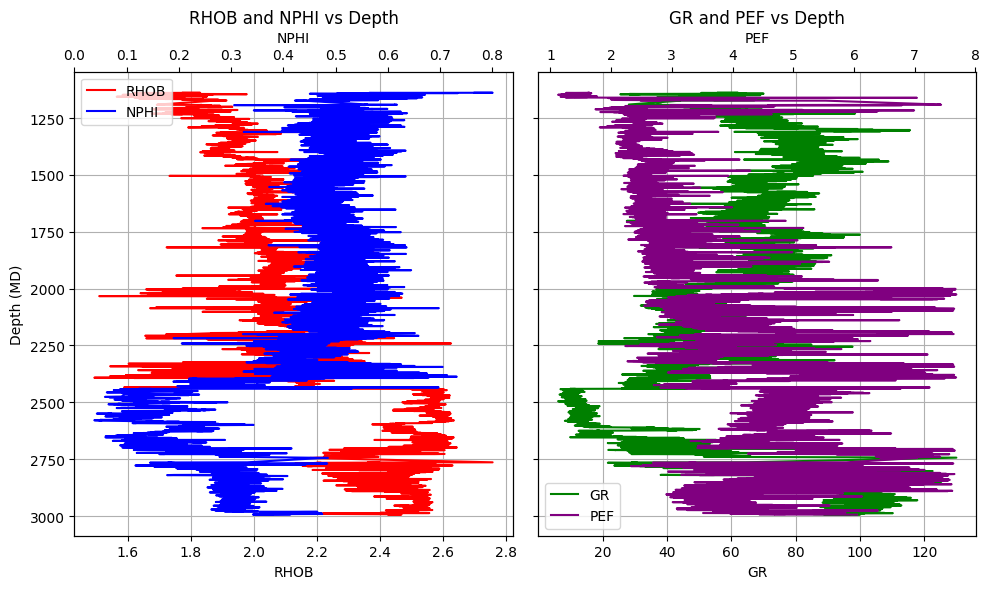

In [36]:
import matplotlib.pyplot as plt

# Create a figure with two vertical subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)  # Share depth axis

# Invert the y-axis so depth increases downward
ax1.invert_yaxis()

# --- First subplot: RHOB and NPHI vs Depth ---
ax1.plot(df['RHOB'], df['DEPTH_MD'], color='red', label='RHOB')
ax1.set_xlabel('RHOB')
ax1.set_ylabel('Depth (MD)')
ax1.set_title('RHOB and NPHI vs Depth')
ax1.grid(True)

# Create a secondary x-axis for NPHI
ax2 = ax1.twiny()
ax2.plot(df['NPHI'], df['DEPTH_MD'], color='blue', label='NPHI')
ax2.set_xlabel('NPHI')

# Combine legends for both axes
ax1_lines, ax1_labels = ax1.get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
ax2.legend(ax1_lines + ax2_lines, ax1_labels + ax2_labels, loc='best')

# --- Second subplot: GR and PEF vs Depth ---
ax3.plot(df['GR'], df['DEPTH_MD'], color='green', label='GR')
ax3.set_xlabel('GR')
ax3.set_title('GR and PEF vs Depth')
ax3.grid(True)

# Create a secondary x-axis for PEF
ax4 = ax3.twiny()
ax4.plot(df['PEF'], df['DEPTH_MD'], color='purple', label='PEF')
ax4.set_xlabel('PEF')

# Combine legends for both axes
ax3_lines, ax3_labels = ax3.get_legend_handles_labels()
ax4_lines, ax4_labels = ax4.get_legend_handles_labels()
ax4.legend(ax3_lines + ax4_lines, ax3_labels + ax4_labels, loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame to avoid modifying the original
df_standardized = df.copy()

# Select numerical columns to standardize
numerical_cols = ['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_standardized[numerical_cols] = scaler.fit_transform(df_standardized[numerical_cols])

# Display the standardized DataFrame
df_standardized


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-1.512028,-0.160483,1138.704,2.511891,-1.582936,0.858348
1,-1.406945,0.042222,1138.856,2.756852,-1.572209,0.680734
2,-1.340331,0.090042,1139.008,2.512532,-1.571583,0.546460
3,-1.293939,0.045511,1139.160,2.060743,-1.591842,0.577084
4,-1.355648,-0.055496,1139.312,1.613389,-1.682935,0.742844
...,...,...,...,...,...,...
12197,1.253023,1.233903,2993.256,-0.510192,0.839394,-1.139533
12198,1.210297,1.164741,2993.408,-0.442165,0.839394,-1.148876
12199,1.097519,1.297954,2993.560,-0.343194,0.839394,-1.096449
12200,1.082574,1.448536,2993.712,-0.326519,1.254018,-1.086336


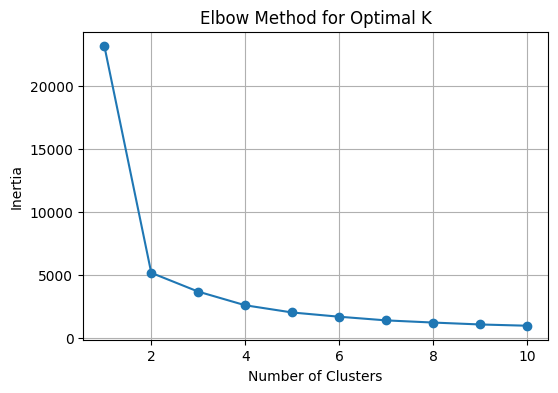

       RHOB        GR  DEPTH_MD      NPHI       PEF       DTC  C_RHOBvsNPHI
0 -1.512028 -0.160483  1138.704  2.511891 -1.582936  0.858348             0
1 -1.406945  0.042222  1138.856  2.756852 -1.572209  0.680734             0
2 -1.340331  0.090042  1139.008  2.512532 -1.571583  0.546460             0
3 -1.293939  0.045511  1139.160  2.060743 -1.591842  0.577084             0
4 -1.355648 -0.055496  1139.312  1.613389 -1.682935  0.742844             0
Silhouette Score: 0.6938


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering
features = ['RHOB', 'NPHI']
X = df_standardized[features]

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the elbow point
n_clusters = 2  # Adjust based on the plot observation

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
df_standardized['C_RHOBvsNPHI'] = kmeans.fit_predict(X)  # Assign cluster labels

# Display the first few rows of the clustered dataset
print(df_standardized.head())

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

In [39]:
# Add the cluster labels from the standardized dataset to the original dataset
df['C_RHOBvsNPHI'] = df_standardized['C_RHOBvsNPHI']

# Display the first few rows of the updated DataFrame
print(df.head())

       RHOB         GR  DEPTH_MD      NPHI       PEF         DTC  C_RHOBvsNPHI
0  1.774626  55.892757  1138.704  0.765867  1.631495  147.837677             0
1  1.800986  60.929138  1138.856  0.800262  1.645080  142.382431             0
2  1.817696  62.117264  1139.008  0.765957  1.645873  138.258331             0
3  1.829333  61.010860  1139.160  0.702521  1.620216  139.198914             0
4  1.813854  58.501236  1139.312  0.639708  1.504854  144.290085             0


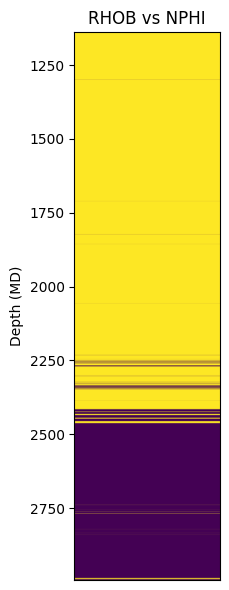

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 6))  # Adjusted figure size for better visibility

# Plot Depth vs Cluster1 (RHOB vs NPHI) on the left subplot
im1 = axes[0].imshow(
    np.array([df_standardized['C_RHOBvsNPHI']]).T,
    aspect='auto',
    extent=[0, 1, df['DEPTH_MD'].max(), df['DEPTH_MD'].min()],  # Adjust the extent to reverse the depth axis
    cmap='viridis_r'
)
axes[0].set_ylabel('Depth (MD)')
axes[0].set_xticks([])  # Remove x-axis ticks
axes[0].set_title('RHOB vs NPHI')

# Placeholder for second subplot (you can define a second clustering visualization)
axes[1].set_visible(False)  # Hide the second subplot if not used

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


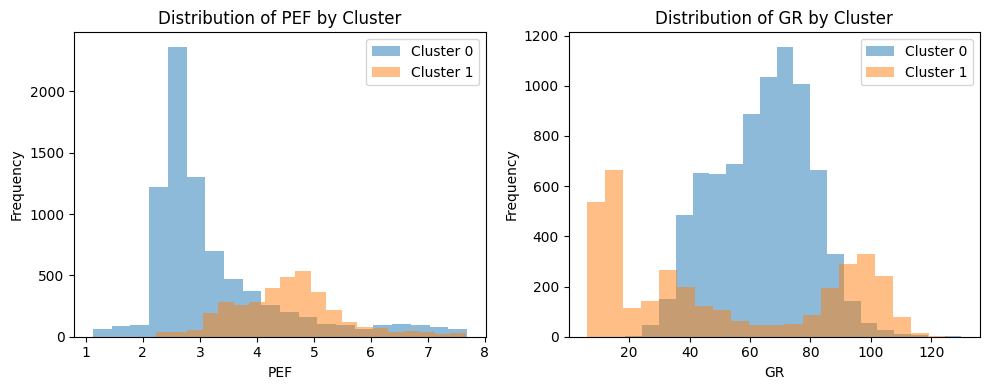

In [41]:
import matplotlib.pyplot as plt

# Create a list of DataFrames, one for each cluster
cluster_dfs = [df[df['C_RHOBvsNPHI'] == i] for i in range(n_clusters)]

# Define the number of variables to plot
num_vars = len(variables_clustering)

# Create subplots: one per variable
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(5 * num_vars, 4))  # Adjusted figure size

# Iterate over variables and create histograms for each cluster
for i, var in enumerate(variables_clustering):
    ax = axes[i] if num_vars > 1 else axes  # Ensure axes work for single variable case
    for j in range(n_clusters):
        ax.hist(cluster_dfs[j][var], bins=20, alpha=0.5, label=f'Cluster {j}')
    ax.set_title(f'Distribution of {var} by Cluster')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


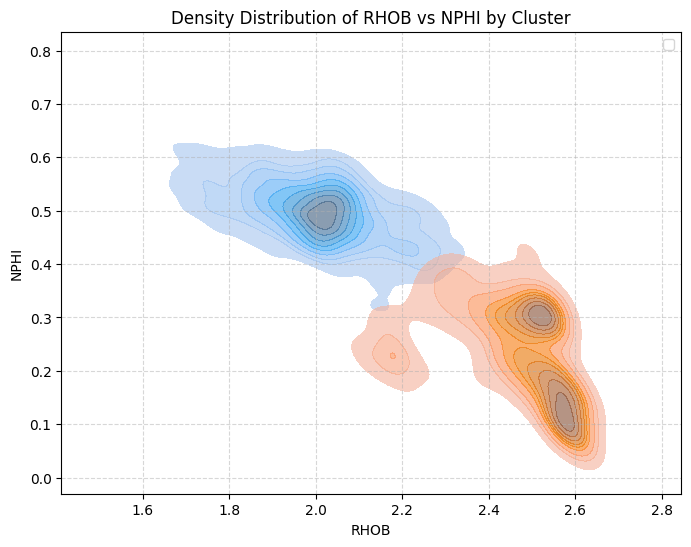

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Plot KDE for each cluster with distinct colors
for cluster in df['C_RHOBvsNPHI'].unique():
    sns.kdeplot(
        x=df[df['C_RHOBvsNPHI'] == cluster]['RHOB'],
        y=df[df['C_RHOBvsNPHI'] == cluster]['NPHI'],
        label=f'Cluster {cluster}',
        fill=True,  # Filled contours for better visualization
        alpha=0.6,  # Adjust transparency for clarity
        thresh=0.05  # Avoid plotting very low-density areas
    )

# Add labels and title
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('Density Distribution of RHOB vs NPHI by Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

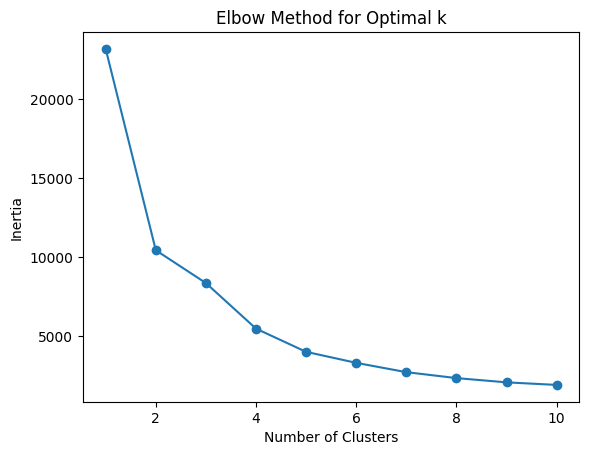

       RHOB        GR  DEPTH_MD      NPHI       PEF       DTC  C_RHOBvsNPHI  \
0 -1.512028 -0.160483  1138.704  2.511891 -1.582936  0.858348             0   
1 -1.406945  0.042222  1138.856  2.756852 -1.572209  0.680734             0   
2 -1.340331  0.090042  1139.008  2.512532 -1.571583  0.546460             0   
3 -1.293939  0.045511  1139.160  2.060743 -1.591842  0.577084             0   
4 -1.355648 -0.055496  1139.312  1.613389 -1.682935  0.742844             0   

   C_PEFvsGR  
0          0  
1          0  
2          0  
3          0  
4          0  
Silhouette Coefficient: 0.5239726175389308


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select the variables for clustering
variables_clustering = ['PEF', 'GR']
X = df_standardized[variables_clustering]

# Finding the optimal number of clusters using the Elbow Method
inertia = []  # Store the inertia (sum of squared distances to centroids)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia for different cluster counts to find the "elbow"
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, select the optimal number of clusters (e.g., 2 clusters)
n_clusters = 2

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Assign the cluster labels to the original DataFrame
df_standardized['C_PEFvsGR'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df_standardized.head())

# Evaluate the clustering quality using the Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Coefficient: {silhouette_avg}")

# Optionally, visualize the clusters (if there are 2 or 3 variables)
# sns.scatterplot(x='PEF', y='GR', hue='C_PEFvsGR', data=df_standardized)
# plt.title('K-Means Clusters Visualization')
# plt.show()


In [44]:
# Add the cluster labels from the standardized DataFrame to the original DataFrame
df['C_PEFvsGR'] = df_standardized['C_PEFvsGR']

# Now 'df' contains the 'C_PEFvsGR' column with the cluster labels
print(df.head())

       RHOB         GR  DEPTH_MD      NPHI       PEF         DTC  \
0  1.774626  55.892757  1138.704  0.765867  1.631495  147.837677   
1  1.800986  60.929138  1138.856  0.800262  1.645080  142.382431   
2  1.817696  62.117264  1139.008  0.765957  1.645873  138.258331   
3  1.829333  61.010860  1139.160  0.702521  1.620216  139.198914   
4  1.813854  58.501236  1139.312  0.639708  1.504854  144.290085   

   C_RHOBvsNPHI  C_PEFvsGR  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  


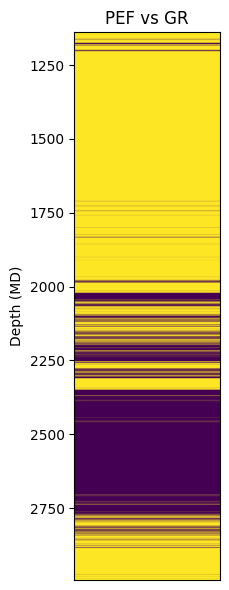

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 6))  # Adjusted figure size for better visibility

# Plot Depth vs Cluster (PEF vs GR) on the left subplot using imshow
im1 = axes[0].imshow(
    np.array([df_standardized['C_PEFvsGR']]).T,
    aspect='auto',
    extent=[0, 1, df['DEPTH_MD'].max(), df['DEPTH_MD'].min()],  # Reverse the depth axis
    cmap='viridis_r'
)
axes[0].set_ylabel('Depth (MD)')
axes[0].set_xticks([])  # Remove x-axis ticks
axes[0].set_title('PEF vs GR')

# Placeholder for second subplot (can be used for another visualization)
axes[1].set_visible(False)  # Hide the second subplot if not used

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


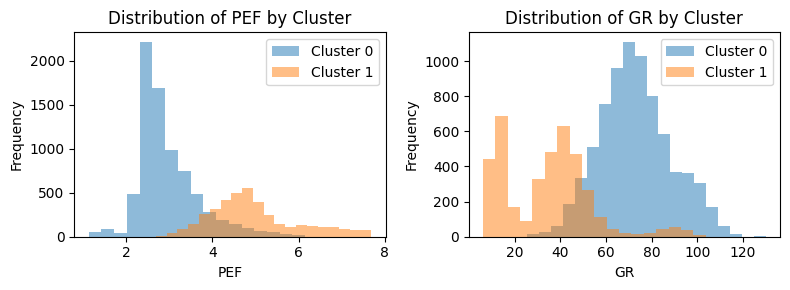

In [55]:
import matplotlib.pyplot as plt

# Create a list of DataFrames, one for each cluster
cluster_dfs = [df[df['C_PEFvsGR'] == cluster_id] for cluster_id in range(n_clusters)]

# Define the number of variables to plot
num_vars = len(variables_clustering)

# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(4 * num_vars, 3))

# Iterate through the variables and plot histograms for each cluster
for i, var in enumerate(variables_clustering):
    ax = axes[i]

    # Plot histograms for each cluster
    for cluster_id in range(n_clusters):
        ax.hist(cluster_dfs[cluster_id][var], bins=20, alpha=0.5, label=f'Cluster {cluster_id}')

    # Set titles and labels for each subplot
    ax.set_title(f'Distribution of {var} by Cluster')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

    # Add legend for the clusters
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


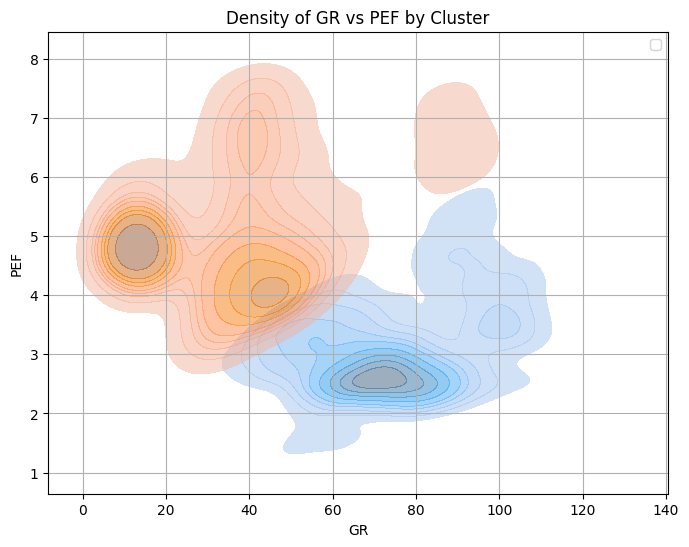

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# Iterate over clusters and plot each with a different color
for cluster in df['C_PEFvsGR'].unique():
    sns.kdeplot(
        x=df[df['C_PEFvsGR'] == cluster]['GR'],  # GR values for each cluster
        y=df[df['C_PEFvsGR'] == cluster]['PEF'],  # PEF values for each cluster
        label=f'Cluster {cluster}',  # Label for the cluster
        fill=True,  # Fill the area under the curve
        alpha=0.5,  # Set transparency
    )

# Set axis labels and plot title
plt.xlabel('GR')
plt.ylabel('PEF')
plt.title('Density of GR vs PEF by Cluster')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



---
## Geological Interpretation
---
**Gamma Ray (GR): Practical Summary:**
- **High GR (> 75 API units):** Shales or clay-rich formations.
- **Moderate GR (50-75 API units):** Sandstones with clay or mixed formations.
- **Low GR (< 50 API units):** Clean sandstones, limestones, dolomites (non-shale rocks).

**PEF: Practical Summary**
- **< 3:** Sandstone or siliceous rocks.
- **3-4:** Dolomite.
- **> 4:** Limestone or carbonaceous rocks.

---

### Cluster 0:
* **Lithology:** Shale or clay with some sand (possibly a sandy shale).
* **Position in the reservoir system:** This type of formation typically acts as a seal rock due to its high clay and water content. Although it contains some sand, its ability to store or transmit hydrocarbons is limited.
* **Reservoir Potential:** Very low, as its effective porosity and permeability are restricted by the clay content. It is likely to act as a barrier to hydrocarbons in the underlying or adjacent layers.

### Cluster 1:
* **Lithology:** Compact and clean limestone.
* **Position in the reservoir system:** This type of formation could act as a reservoir rock if there are zones with secondary porosity, such as fractures or dissolution that increase the effective pore space.
* **Reservoir Potential:** Moderate. The rock is a clean limestone with low clay content and may have good potential as a reservoir in areas with secondary porosity, though primary porosity is low.

---

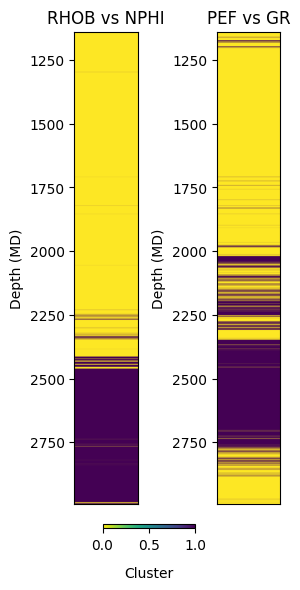

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))  # Adjusted size for better visibility

# First subplot: RHOB vs NPHI by Cluster
im1 = axes[0].imshow(
    np.array([df_standardized['C_RHOBvsNPHI']]).T,
    aspect='auto',
    extent=[0, 1, df['DEPTH_MD'].max(), df['DEPTH_MD'].min()],  # Reverse the depth axis
    cmap='viridis_r'
)
axes[0].set_ylabel('Depth (MD)')
axes[0].set_xticks([])  # Remove X-axis ticks
axes[0].set_title('RHOB vs NPHI')

# Second subplot: PEF vs GR by Cluster
im2 = axes[1].imshow(
    np.array([df_standardized['C_PEFvsGR']]).T,
    aspect='auto',
    extent=[0, 1, df['DEPTH_MD'].max(), df['DEPTH_MD'].min()],  # Reverse the depth axis
    cmap='viridis_r'
)
axes[1].set_ylabel('Depth (MD)')
axes[1].set_xticks([])  # Remove X-axis ticks
axes[1].set_title('PEF vs GR')

# Add a single horizontal color bar for the entire figure
cbar = plt.colorbar(im1, ax=axes, orientation='horizontal', fraction=0.01, pad=0.08)
cbar.set_label('Cluster', rotation=0, labelpad=10)  # Label for the color bar

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust bottom space to avoid overlap with the color bar
plt.show()
